# Analysis of reproducibility
The following notebook will analyze the performance of our models by displaying each models' performance metrics in graphs. 

<img src="https://www.alfadispenser.com/wp-content/uploads/2018/05/Reproducibility-image.jpg" width="70%" align="left"/>

## Imports

In [1]:
import os, glob, json
from matplotlib import pyplot

## Some code
First, we need to define some functions we will use to display the data in graphs as well as fetch our results from the correct location.

In [2]:
def get_data(modelType: str, normalizationFunctionUsed: str, kernelType = None):
    '''
    Returns array of models performance
    @modelType: SVM|RF|LR
    @normalizationFunctionUsed: norm1|norm2
    '''
    fileName = f"{modelType}/{kernelType}_svm_{normalizationFunctionUsed}_report.json" if kernelType else f"{modelType}/*_{normalizationFunctionUsed}_report.json"
    for file in glob.glob(fileName):
        with open(file, 'r') as jsonFile:
            data = json.load(jsonFile)
        return data[0]
    
def get_metric(data, dataset, metric):
    scores = []
    for model in data:
        score = model[dataset][metric]
        scores.append(score)
    return scores
    
def plot_boxplot(data, labels, title, xlabel, ylabel):
    '''
    Plots the box plot of models and a metric
    '''
    pyplot.boxplot(data, labels=labels, showmeans=True)
    pyplot.title(title)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()
    
def display_metrics(data, dataset, title, xlabel, ylabel):
    '''
    Plots BA, AUC, Sensitivity & Specificity for a given model
    '''
    balanced_accuracy = get_metric(linear_svm_n1_data, dataset, "balanced_accuracy")
    auc = get_metric(data, dataset, "auc")
    sensitivity = get_metric(data, dataset, "sensitivity")
    specificity = get_metric(data, dataset, "specificity")
    plot_boxplot([balanced_accuracy, auc, sensitivity, specificity], ["balanced_accuracy", "auc", "sensitivity", "specificity"], title, xlabel, ylabel)

# SVM

In the following section, we will analyze the metrics acquired from the SVM model

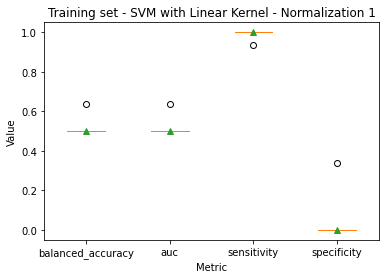

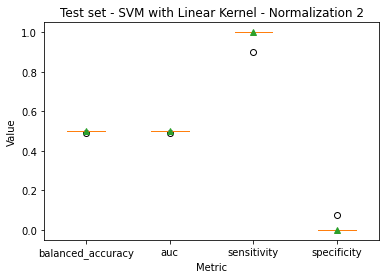

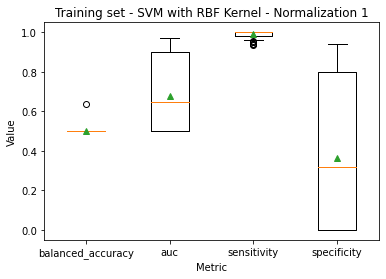

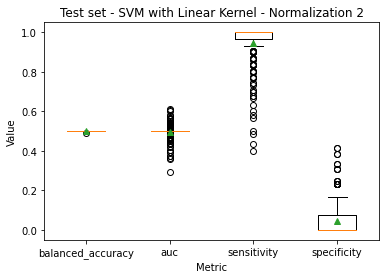

In [3]:
linear_svm_n1_data = get_data("SVM", "norm1", kernelType = "linear")
linear_svm_n2_data = get_data("SVM", "norm2", kernelType = "linear")
rbf_svm_n1_data = get_data("SVM", "norm1", kernelType = "rbf")
rbf_svm_n2_data = get_data("SVM", "norm2", kernelType = "rbf")

display_metrics(linear_svm_n1_data, "train", "Training set - SVM with Linear Kernel - Normalization 1", "Metric", "Value")
display_metrics(linear_svm_n1_data, "test", "Test set - SVM with Linear Kernel - Normalization 2", "Metric", "Value")
display_metrics(rbf_svm_n1_data, "train", "Training set - SVM with RBF Kernel - Normalization 1", "Metric", "Value")
display_metrics(rbf_svm_n2_data, "test", "Test set - SVM with Linear Kernel - Normalization 2", "Metric", "Value")

# Logistic Regression
In the following section, we will analyze the metrics acquired from the Logistic Regression model

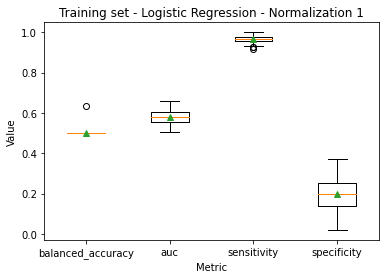

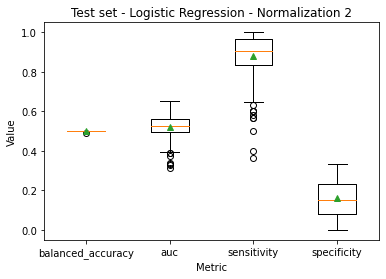

In [4]:
lr_n1_data = get_data("LR", "norm1")
lr_n2_data = get_data("LR", "norm2")

display_metrics(lr_n1_data, "train", "Training set - Logistic Regression - Normalization 1", "Metric", "Value")
display_metrics(lr_n2_data, "test", "Test set - Logistic Regression - Normalization 2", "Metric", "Value")

# Random Forest
In the following section, we will analyze the metrics acquired from the Random Forest model

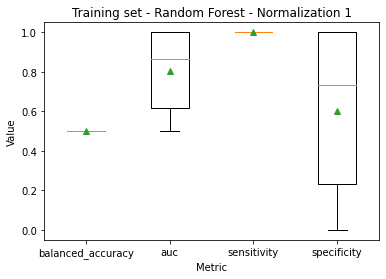

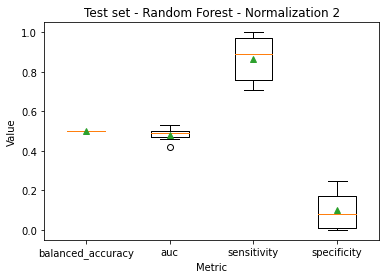

In [16]:
rf_n1_data = get_data("RF", "norm1")
rf_n2_data = get_data("RF", "norm2")

display_metrics(rf_n1_data, "train", "Training set - Random Forest - Normalization 1", "Metric", "Value")
display_metrics(rf_n2_data, "test", "Test set - Random Forest - Normalization 2", "Metric", "Value")

# Cross Validation
In the following section, we will cover every models performance over all iterations.